In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
path = os.getcwd()
path

'C:\\Users\\wyame\\Downloads'

In [11]:
df = pd.read_csv('stroopdata.csv')
df['ParticipantID'] = df.index + 1
df

,Congruent,Incongruent,ParticipantID
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


**1. What is our independent variable? What is our dependent variable?**

   Independent variable : Congruent or incongruent word list.

   Dependent variable: Response time from 24 participants.

**2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

Null Hypothesis: H0=μi−μc=0

There is no difference in response time between viewing congruent & incongruent words

Alternative Hypothesis: HA=μi−μc≠0

There is significant difference in the participants response time in viewing congruent words vs incongruent words, regardless the response time is faster or slower than the pre-test period.

The Dependent Samples t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. The different conditions are dependent because, in theory, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here).


**3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**


In [13]:
#Separate congruent and incongruent data
congruent = df['Congruent'] 
incongruent = df['Incongruent']

In [29]:
#Set up coding for all measurement
#Central tendency
congruent_mean = round(congruent.mean(),2)
print 'congruent_mean=' + str(congruent_mean)

congruent_mean=14.05


In [30]:
incongruent_mean = round(incongruent.mean(),2)
print 'incongruent_mean=' + str(incongruent_mean)

incongruent_mean=22.02


In [31]:
congruent_median = round(congruent.median(),2)
print 'congruent_median=' + str(congruent_median)

congruent_median=14.36


In [32]:
incongruent_median = round(incongruent.median(),2)
print 'incongruent_median=' + str(incongruent_median)

incongruent_median=21.02


In [33]:
#Variability 
congruent_std = round(congruent.std(),2)
print 'congruent_std=' + str(congruent_std)

congruent_std=3.56


In [34]:
incongruent_std = round(incongruent.std(),2)
print 'incongruent_std=' + str(incongruent_std)

incongruent_std=4.8


**4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**


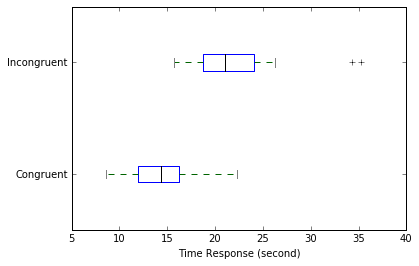

In [36]:
df.plot(x = 'ParticipantID', 
          kind = 'box', 
          vert = False,
          color = dict(boxes = 'Blue', 
                       whiskers = 'DarkGreen', 
                       medians = 'Black',
                       caps = 'Gray')
         ).set_xlabel('Time Response (second)')
plt.show()

Observation: Visually speaking, the box plot shows that the mean of incongruent response time may not be within the t-critical from congruent response time. Also, we can also see few outlier from "Incongruent" that could indicate the response time is significant higher if we take more sample sizes.But in order to firmly confirm, we need to conduct proper statistical test as listed below.


##5. Statistical test & result

__With 90% Confidence Interval__
\begin{align}
\alpha = 0.1 &&
Df = 23&&
t-critical= +1.714, -1.714
\end{align}

In [37]:
#Calculate Point Estimate 
point_estimate = round((incongruent_mean - congruent_mean),2)
point_estimate

7.97

In [42]:
#Calculate Standard Deviation Difference between Congruent & Incongruent using NumPy package
df['D'] = df['Incongruent'] - df['Congruent']
df['D']
s = round((np.std(df['D'],ddof = 1)),3)
s

4.865

In [43]:
#Calculate t-statistic with n = 24, point estimate = 7.97 and standard deviation
t = round(point_estimate/(s/math.sqrt(24)),3)
t

8.026

__Result__:

t-statistic = 8.027 > t-critical = 1.714 by a significant amount. Therefore, we __reject the null hypothesis__ that there is no significant difference between response time in these 2 tests. In fact, it maybe took much longer and completely out of the t-table. Intuitively speaking, this result is align with common sense that people take longer time to process information that contradict to their existed perception toward the subject.  